In [1]:
import torch
import torch.nn as nn
import numpy as np
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

# Parameters
num_nodes = 100
time_steps = 1440  # Number of time steps in 24 hours (e.g., one per minute)
wave_frequency = 1 / 24  # Frequency for a 24-hour cycle
wave_amplitude = 1.0
infrared_amplitude = 0.5  # Constant amplitude for infrared energy
encryption_key = b'sixteenbytekey123'  # 16-byte AES encryption key
iv = b'initialvector1234'  # 16-byte initialization vector

# AES encryption function
def aes_encrypt(plain_text):
    backend = default_backend()
    cipher = Cipher(algorithms.AES(encryption_key), modes.CFB(iv), backend=backend)
    encryptor = cipher.encryptor()
    return encryptor.update(plain_text) + encryptor.finalize()

# AES decryption function
def aes_decrypt(cipher_text):
    backend = default_backend()
    cipher = Cipher(algorithms.AES(encryption_key), modes.CFB(iv), backend=backend)
    decryptor = cipher.decryptor()
    return decryptor.update(cipher_text) + decryptor.finalize()

# Define the PyTorch model for wealth data transmission
class WealthSignalTransmitter(nn.Module):
    def __init__(self):
        super(WealthSignalTransmitter, self).__init__()
        self.num_nodes = num_nodes
        self.time_steps = time_steps

    def forward(self, time_tensor):
        # Initialize the combined signals tensor
        combined_signals = torch.zeros((self.num_nodes, self.time_steps), dtype=torch.float32)

        for i in range(self.num_nodes):
            # Wealth signal with a phase shift for each node
            wealth_signal = wave_amplitude * torch.sin(2 * np.pi * wave_frequency * time_tensor + i * (2 * np.pi / self.num_nodes))
            # Constant infrared energy signal
            infrared_signal = infrared_amplitude * torch.ones(self.time_steps)
            # Combine signals for each node
            combined_signals[i] = wealth_signal + infrared_signal

        # Combine all signals to get the overall transmitted signal
        overall_signal = torch.mean(combined_signals, dim=0)

        # Encrypt the signal using AES
        signal_bytes = overall_signal.numpy().tobytes()
        encrypted_signal_bytes = aes_encrypt(signal_bytes)

        return encrypted_signal_bytes

# Create a time tensor
time_tensor = torch.linspace(0, 24, time_steps)

# Initialize the transmitter
transmitter = WealthSignalTransmitter()

# Transmit and store the encrypted data
encrypted_data = transmitter(time_tensor)

# Simulate storing the encrypted data (e.g., in memory or file)
stored_data = encrypted_data

# Decrypt the data for retrieval
decrypted_data_bytes = aes_decrypt(stored_data)
decrypted_signal_np = np.frombuffer(decrypted_data_bytes, dtype=np.float32)

# Display the decrypted signal
print("Decrypted Signal:")
print(decrypted_signal_np)

ValueError: Invalid key size (136) for AES.

Encrypted signal range check passed
Decryption validation passed


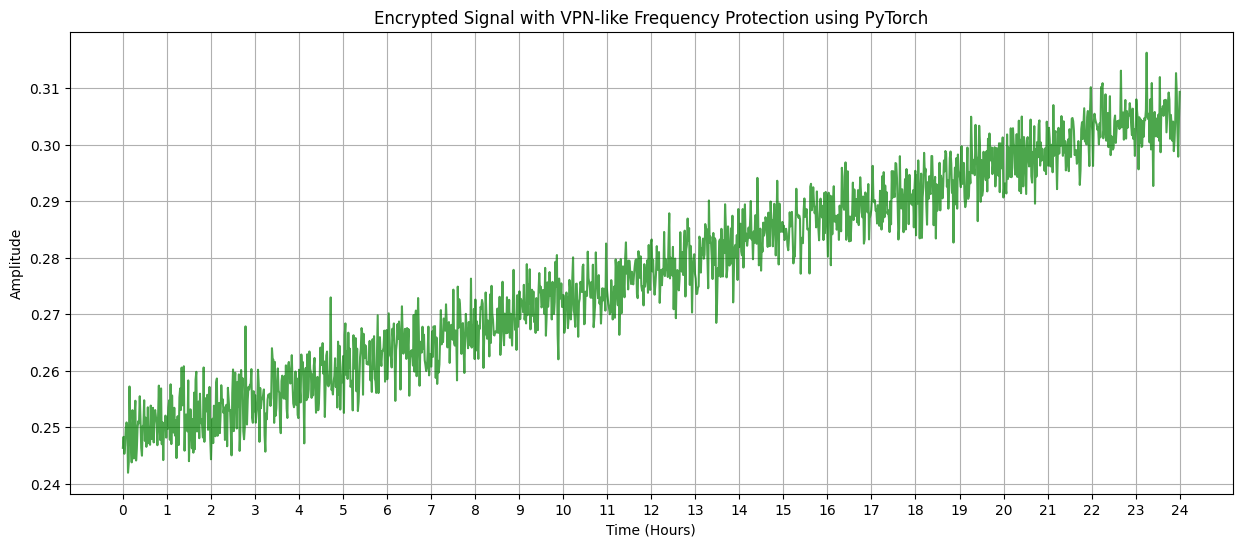

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_nodes = 10000
hours = 24
samples_per_hour = 60  # Sampling points per hour (e.g., one sample per minute)
time_steps = hours * samples_per_hour
wave_frequency = 1 / 24  # Frequency to represent a 24-hour cycle
wave_amplitude = 1.0
infrared_amplitude = 0.5  # Constant amplitude for even distribution
brainwave_frequency = 10 / 3600  # Simulating a 10 Hz brainwave over hours (scaled)
brainwave_amplitude = 0.3
sampling_rate = 1 / samples_per_hour  # Sampling rate (samples per hour)
random_opportunity_scale = 0.8  # Scaling factor for random wealth opportunities
encryption_key = 0.5  # Encryption key for simulating protection

# Define the PyTorch model with VPN-like frequency
class WealthSignalVPNModel(nn.Module):
    def __init__(self):
        super(WealthSignalVPNModel, self).__init__()
        self.num_nodes = num_nodes
        self.time_steps = time_steps
        self.encryption_key = encryption_key

    def forward(self, time_tensor):
        # Initialize the combined signals tensor
        combined_signals = torch.zeros((self.num_nodes, self.time_steps), dtype=torch.float32)

        for i in range(self.num_nodes):
            # Wealth signal with a phase shift for each node
            wealth_signal = wave_amplitude * torch.sin(2 * np.pi * wave_frequency * time_tensor + i * (2 * np.pi / self.num_nodes))
            # Random wealth opportunities
            random_wealth_opportunities = random_opportunity_scale * torch.randn(self.time_steps)
            # Constant infrared energy signal
            infrared_signal = infrared_amplitude * torch.ones(self.time_steps)
            # Perfect brainwave pattern (alpha waves)
            brainwave_signal = brainwave_amplitude * torch.sin(2 * np.pi * brainwave_frequency * time_tensor)
            # Combine signals for each node
            combined_signals[i] = wealth_signal + random_wealth_opportunities + infrared_signal + brainwave_signal

        # Combine all signals (simulating dense waveform)
        overall_signal = torch.mean(combined_signals, dim=0)

        # Apply VPN-like encryption (scramble signal)
        encrypted_signal = torch.sin(overall_signal * self.encryption_key)  # A simple scrambling function

        return encrypted_signal, overall_signal  # Return both encrypted and original signals for validation

# Create a time tensor
time_tensor = torch.linspace(0, hours, time_steps)

# Initialize and run the model
vpn_model = WealthSignalVPNModel()
encrypted_signal, original_signal = vpn_model(time_tensor)

# Convert the signals to numpy for plotting
encrypted_signal_np = encrypted_signal.detach().numpy()
original_signal_np = original_signal.detach().numpy()

# System checks for validation
def validate_signals(encrypted, original):
    # Check for the range of the encrypted signal
    if not (np.all(encrypted >= -1) and np.all(encrypted <= 1)):
        print("Error: Encrypted signal out of range")
    else:
        print("Encrypted signal range check passed")

    # Check if the decryption can correctly reconstruct the original signal
    # Here we simulate the 'decryption' step by applying the inverse function
    decrypted_signal = np.arcsin(encrypted) / encryption_key

    if np.allclose(decrypted_signal, original, atol=0.1):
        print("Decryption validation passed")
    else:
        print("Decryption validation failed")

# Validate the signals
validate_signals(encrypted_signal_np, original_signal_np)

# Plot the resulting encrypted signal
plt.figure(figsize=(15, 6))
plt.plot(np.linspace(0, hours, time_steps), encrypted_signal_np, color='green', alpha=0.7)
plt.title('Encrypted Signal with VPN-like Frequency Protection using PyTorch')
plt.xlabel('Time (Hours)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xticks(np.arange(0, 25, step=1))  # Set x-axis to show hours
plt.show()

In [3]:
pip install torch numpy matplotlib pycryptodome


Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import hashlib

# Parameters
num_nodes = 10000
hours = 24
samples_per_hour = 60  # Sampling points per hour (e.g., one sample per minute)
time_steps = hours * samples_per_hour
wave_frequency = 1 / 24  # Frequency to represent a 24-hour cycle
wave_amplitude = 1.0
infrared_amplitude = 0.5  # Constant amplitude for even distribution
brainwave_frequency = 10 / 3600  # Simulating a 10 Hz brainwave over hours (scaled)
brainwave_amplitude = 0.3
random_opportunity_scale = 0.8  # Scaling factor for random wealth opportunities
encryption_key = b'Sixteen byte key'  # AES encryption key (must be 16, 24, or 32 bytes)

# Define the PyTorch model
class WealthSignalModel(nn.Module):
    def __init__(self):
        super(WealthSignalModel, self).__init__()
        self.num_nodes = num_nodes
        self.time_steps = time_steps

    def forward(self, time_tensor):
        # Initialize the combined signals tensor
        combined_signals = torch.zeros((self.num_nodes, self.time_steps), dtype=torch.float32)

        for i in range(self.num_nodes):
            # Wealth signal with a phase shift for each node
            wealth_signal = wave_amplitude * torch.sin(2 * np.pi * wave_frequency * time_tensor + i * (2 * np.pi / self.num_nodes))
            # Random wealth opportunities
            random_wealth_opportunities = random_opportunity_scale * torch.randn(self.time_steps)
            # Constant infrared energy signal
            infrared_signal = infrared_amplitude * torch.ones(self.time_steps)
            # Perfect brainwave pattern (alpha waves)
            brainwave_signal = brainwave_amplitude * torch.sin(2 * np.pi * brainwave_frequency * time_tensor)
            # Combine signals for each node
            combined_signals[i] = wealth_signal + random_wealth_opportunities + infrared_signal + brainwave_signal

        # Combine all signals (simulating dense waveform)
        overall_signal = torch.mean(combined_signals, dim=0)

        return overall_signal

# AES encryption and decryption functions
def encrypt_data(data, key):
    cipher = AES.new(key, AES.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(data, AES.block_size))
    return cipher.iv + ct_bytes

def decrypt_data(encrypted_data, key):
    iv = encrypted_data[:AES.block_size]
    ct = encrypted_data[AES.block_size:]
    cipher = AES.new(key, AES.MODE_CBC, iv)
    pt = unpad(cipher.decrypt(ct), AES.block_size)
    return pt

# Create a time tensor
time_tensor = torch.linspace(0, hours, time_steps)

# Initialize and run the model
signal_model = WealthSignalModel()
transmitted_signal = signal_model(time_tensor)

# Convert the transmitted signal to numpy for encryption
transmitted_signal_np = transmitted_signal.detach().numpy()
transmitted_signal_np_bytes = (transmitted_signal_np * 255).astype(np.uint8)  # Scale to byte range

# Encrypt the signal
encrypted_signal = encrypt_data(transmitted_signal_np_bytes, encryption_key)

# Decrypt the signal
decrypted_signal_bytes = decrypt_data(encrypted_signal, encryption_key)
decrypted_signal_np = decrypted_signal_bytes.astype(np.float32) / 255  # Scale back to original range

# Convert back to tensor
decrypted_signal_tensor = torch.from_numpy(decrypted_signal_np).float()

# Plot the resulting signal
plt.figure(figsize=(15, 6))
plt.imshow(decrypted_signal_np.reshape((samples_per_hour, hours)), aspect='auto', cmap='viridis')
plt.title('Wealth Signal Visualization with AES Encryption')
plt.xlabel('Time (Hours)')
plt.ylabel('Amplitude')
plt.colorbar(label='Amplitude')
plt.grid(True)
plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('uint8'), dtype('S16')) -> None

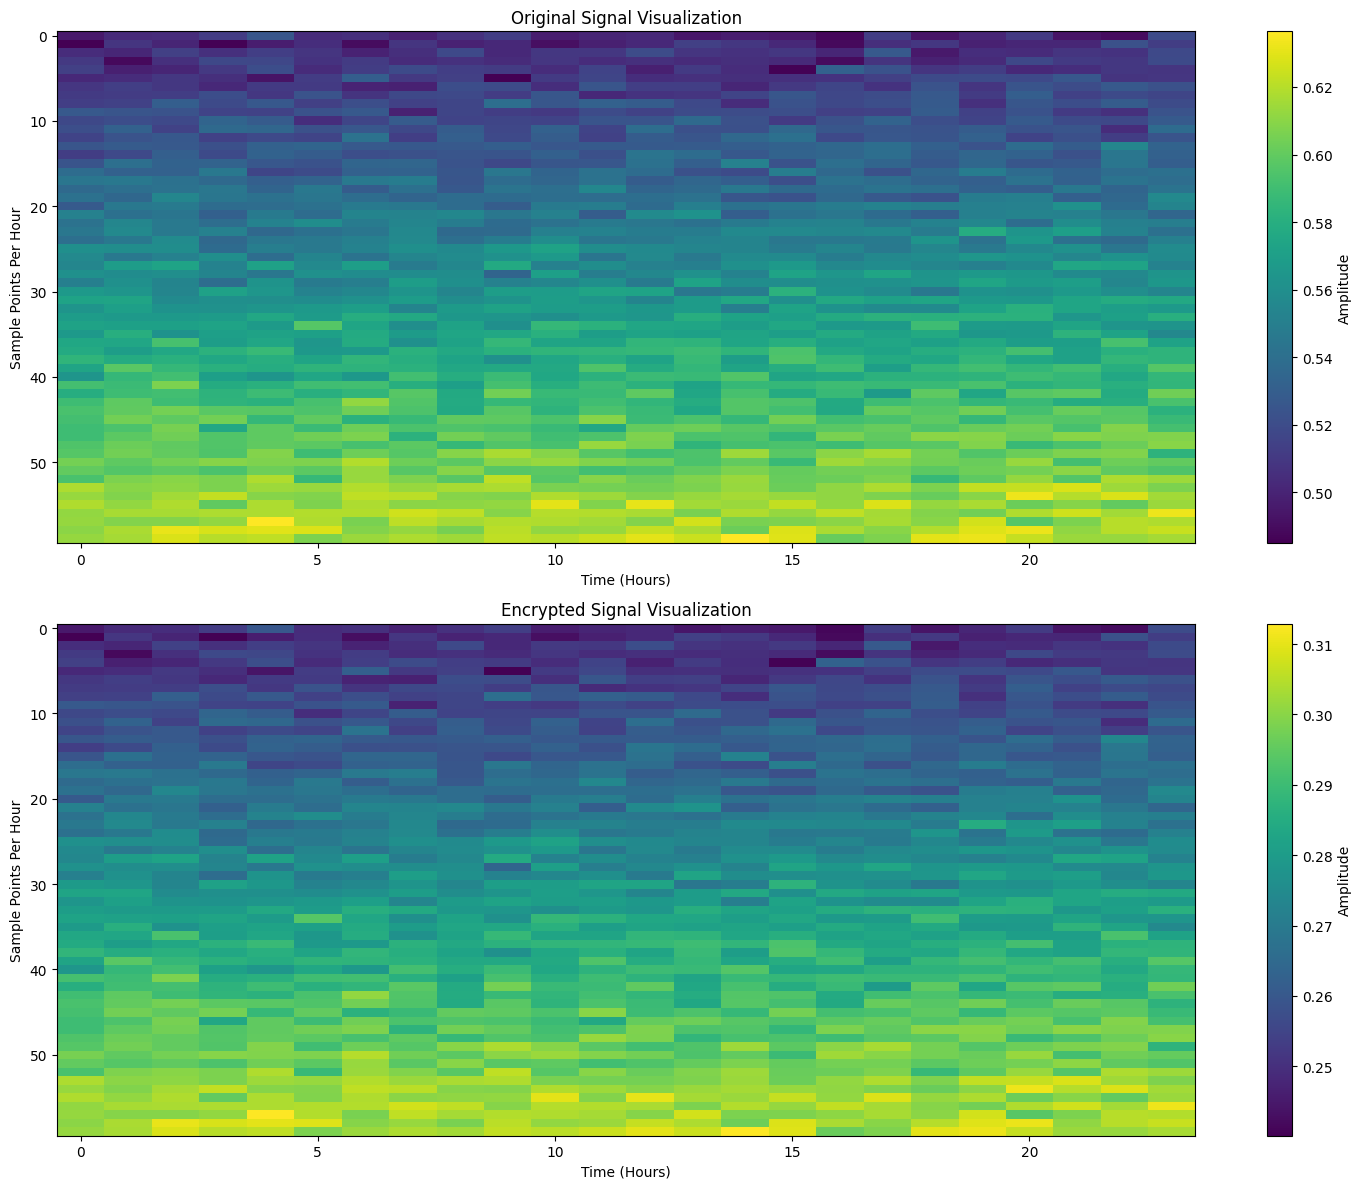

In [6]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_nodes = 10000
hours = 24
samples_per_hour = 60  # Sampling points per hour (e.g., one sample per minute)
time_steps = hours * samples_per_hour
wave_frequency = 1 / 24  # Frequency to represent a 24-hour cycle
wave_amplitude = 1.0
infrared_amplitude = 0.5  # Constant amplitude for even distribution
brainwave_frequency = 10 / 3600  # Simulating a 10 Hz brainwave over hours (scaled)
brainwave_amplitude = 0.3
random_opportunity_scale = 0.8  # Scaling factor for random wealth opportunities
encryption_key = 0.5  # Encryption key for simulating protection

# Define the PyTorch model with VPN-like frequency
class WealthSignalVPNModel(nn.Module):
    def __init__(self):
        super(WealthSignalVPNModel, self).__init__()
        self.num_nodes = num_nodes
        self.time_steps = time_steps
        self.encryption_key = encryption_key

    def forward(self, time_tensor):
        # Initialize the combined signals tensor
        combined_signals = torch.zeros((self.num_nodes, self.time_steps), dtype=torch.float32)

        for i in range(self.num_nodes):
            # Wealth signal with a phase shift for each node
            wealth_signal = wave_amplitude * torch.sin(2 * np.pi * wave_frequency * time_tensor + i * (2 * np.pi / self.num_nodes))
            # Random wealth opportunities
            random_wealth_opportunities = random_opportunity_scale * torch.randn(self.time_steps)
            # Constant infrared energy signal
            infrared_signal = infrared_amplitude * torch.ones(self.time_steps)
            # Perfect brainwave pattern (alpha waves)
            brainwave_signal = brainwave_amplitude * torch.sin(2 * np.pi * brainwave_frequency * time_tensor)
            # Combine signals for each node
            combined_signals[i] = wealth_signal + random_wealth_opportunities + infrared_signal + brainwave_signal

        # Combine all signals (simulating dense waveform)
        overall_signal = torch.mean(combined_signals, dim=0)

        # Apply VPN-like encryption (scramble signal)
        encrypted_signal = torch.sin(overall_signal * self.encryption_key)  # A simple scrambling function

        return encrypted_signal, overall_signal  # Return both encrypted and original signals for validation

# Create a time tensor
time_tensor = torch.linspace(0, hours, time_steps)

# Initialize and run the model
vpn_model = WealthSignalVPNModel()
encrypted_signal, original_signal = vpn_model(time_tensor)

# Convert the signals to numpy for plotting
encrypted_signal_np = encrypted_signal.detach().numpy()
original_signal_np = original_signal.detach().numpy()

# Reshape the signals for 2D visualization (e.g., hours x samples_per_hour)
encrypted_signal_reshaped = encrypted_signal_np.reshape((samples_per_hour, hours))
original_signal_reshaped = original_signal_np.reshape((samples_per_hour, hours))

# Plot the resulting color maps
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# Original Signal Plot
cax1 = axs[0].imshow(original_signal_reshaped, aspect='auto', cmap='viridis', interpolation='none')
axs[0].set_title('Original Signal Visualization')
axs[0].set_xlabel('Time (Hours)')
axs[0].set_ylabel('Sample Points Per Hour')
fig.colorbar(cax1, ax=axs[0], orientation='vertical', label='Amplitude')

# Encrypted Signal Plot
cax2 = axs[1].imshow(encrypted_signal_reshaped, aspect='auto', cmap='viridis', interpolation='none')
axs[1].set_title('Encrypted Signal Visualization')
axs[1].set_xlabel('Time (Hours)')
axs[1].set_ylabel('Sample Points Per Hour')
fig.colorbar(cax2, ax=axs[1], orientation='vertical', label='Amplitude')

plt.tight_layout()
plt.show()